### Read file and choose a 3-class classification

In [1]:
import numpy as np
import pandas as pd
from pylab import*

In [2]:
def rf(cs = 3): #cs: class size
    data = np.genfromtxt('mnist_X.txt',delimiter = ' ')
    target = np.genfromtxt('mnist_y.txt',delimiter = ' ')
    X, y = data / 255.0, target
    x = X[y <= cs-1]
    y = y[y <= cs-1]
    print 'data shape', data.shape
    print 'target shape', target.shape
    print np.unique(target)
    print x.shape
    print 'class label:', np.unique(y)
    return x,y

### MLP method

In [6]:
def sigmoid(X):
    # X = np.dot(x,theta.T) : m*n dot n*1 = m *1
    h = 1.0 + np.exp(-X)
    return 1.0/h

def encoding(Y,unit):
    size = len(Y)
    y = np.zeros((size, unit))
    for i in range(size):
            y[i][Y[i]] = 1 
    return y

In [7]:
# # test encoding
# Y = np.array([0, 1, 2, 1, 1])
# y = encoding(Y, 3)
# print y

In [11]:
# K fold
def k_fold(size,k, shuffle = False):
    index = np.arange(0,size)
    if shuffle:
        np.random.shuffle(index)
    index = np.reshape(index, (k,size/k))
#     print index
    test = []
    train = []
    cursor = 0
    for i in range(0,k):
        test.append(index[i])
        temp = np.delete(index,i,0)
        train.append(temp.flatten())
    return test, train

def acc(y,pre):
    trnum = 0
    size = float(len(y))
    tr = np.sum(y == pre)
    return tr/size

In [18]:
def prediction(x,model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    predict = sigmoid(z2)
    pre = np.argmax(predict,axis=1)
    return pre


# print 'x.shape', shape(x_t)
# print 'y shape', shape(y_t)
# v, w  = mlp(x_t,y_t,learning_rate= 0.5,max_iter = 1000)
# # print v,w

# pre_x_t =  prediction(x_t,model)
# print np.shape(pre_x_t)
# print pre_x_t
# print y_t

In [23]:
# MLP model
def mlp(X, Y, learning_rate = 0.001, hidden_unit = 500, shuffle = False, epsilon = 0.01, 
        momentum = 0.5, max_iter = 10000):
     
    # Initialize the parameters to random values. We need to learn these.
    (xnum, fnum) = X.shape #(m,n)
    cnum = len(np.unique(Y)) # 3
    
    np.random.seed(0)
    W1 = np.random.randn(fnum,hidden_unit) / np.sqrt(fnum)
    W2 = np.random.randn(hidden_unit,cnum) / np.sqrt(hidden_unit)

    b1 = np.zeros((1, hidden_unit))
    b2 = np.zeros((1, cnum))
    pre_W1 = W1
    pre_W2 = W2
    
    # encoding y in binery
    y = encoding(Y,cnum)
    
    
    # return model
    model = {}
    
    index = np.arange(0,xnum) 
    if shuffle:
        np.random.shuffle(index)
    
    # SGD
    for it in xrange(0, max_iter):
        

        
        # get one example
        i = index[it%xnum]
        xi = X[i] #1*(n+1)
        yi = y[i] # 1*3
        
        # Forward propagation
        z1 = xi.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        pre = sigmoid(z2)

 
        # Backpropagation
        delta3 = (pre - yi)
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        
        delta2 = delta3.dot(W2.T) * a1*(1 - a1)
        dW1 = np.dot(xi[None].T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add momentum to get a faster iteration
        dW2 += momentum * pre_W2
        dW1 += momentum * pre_W1
 
        # Gradient descent parameter update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        pre_W1 = W1
        pre_W2 = W2  
        
    return model

### Evaluate Performance

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
x,y = rf()

data shape (70000L, 784L)
target shape (70000L,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
(21770L, 784L)
class label: [ 0.  1.  2.]


In [22]:
total = len(y)
list_test, list_train = k_fold(total,5,True)
i_test = list_test[0]
i_train = list_train[0]
x_train = x[i_train]
y_train = y[i_train]
x_test = x[i_test]
y_test = y[i_test]

### (1) Evaluate accuracy by number of hidden units

Number of hidden units:  10
Accuracy is:  0.396417087735
Number of hidden units:  20
Accuracy is:  0.613688562242
Number of hidden units:  50
Accuracy is:  0.647450620119
Number of hidden units:  100
Accuracy is:  0.651814423519
Number of hidden units:  150
Accuracy is:  0.713596692696
Number of hidden units:  200
Accuracy is:  0.757464400551
Number of hidden units:  250
Accuracy is:  0.826596233349
Number of hidden units:  300
Accuracy is:  0.827055581075
Number of hidden units:  400
Accuracy is:  0.535829122646
Number of hidden units:  600
Accuracy is:  0.606798346348
Number of hidden units:  800
Accuracy is:  0.491272393202
Number of hidden units:  1000
Accuracy is:  0.355535140101


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


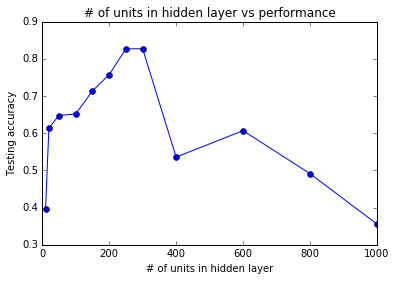

In [26]:
unit_size = [10, 20, 50, 100, 150, 200, 250, 300, 400, 600, 800, 1000]
acclist = []
for us in unit_size:
    print 'Number of hidden units: ', us
    model =  mlp(x_train,y_train, hidden_unit = us, max_iter = 3000)
    pre =  prediction(x_test,model)
    a = acc(y_test,pre)
    print 'Accuracy is: ', a
    acclist.append(a)
    
plt.plot(unit_size, acclist, 'bo-')
plt.title("# of units in hidden layer vs performance")
plt.xlabel("# of units in hidden layer")
plt.ylabel("Testing accuracy")
plt.show()

### (2) Evaluate performance by the nunber of MLP iterations.

Number of iteration:  10
Accuracy is:  0.364492420763
Number of iteration:  100
Accuracy is:  0.364492420763
Number of iteration:  200
Accuracy is:  0.661231051906
Number of iteration:  400
Accuracy is:  0.633210840606
Number of iteration:  800
Accuracy is:  0.46830500689
Number of iteration:  1000
Accuracy is:  0.573954983923
Number of iteration:  2000
Accuracy is:  0.916169039963
Number of iteration:  3000
Accuracy is:  0.920992191089
Number of iteration:  5000
Accuracy is:  0.916858061553
Number of iteration:  8000
Accuracy is:  0.929260450161
Number of iteration:  10000
Accuracy is:  0.920073495636


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


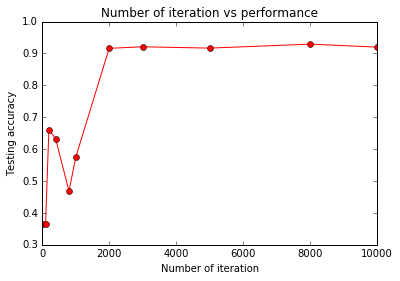

In [27]:
Max_iter = [10, 100, 200, 400, 800, 1000, 2000, 3000, 5000, 8000, 10000]
acc_iter = []
for it in Max_iter:
    print 'Number of iteration: ', it
    model =  mlp(x_train,y_train, learning_rate = 0.001, hidden_unit = 250, epsilon = 0.01, 
        momentum = 0.1, max_iter = it)
    pre =  prediction(x_test,model)
    a = acc(y_test,pre)
    print 'Accuracy is: ', a
    acc_iter.append(a)
    
plt.plot(Max_iter, acc_iter, 'ro-')
plt.title("Number of iteration vs performance")
plt.xlabel("Number of iteration")
plt.ylabel("Testing accuracy")
plt.show()

### (3) Evaluate accuracy by learning rate


Learning rate is 0.0001
Accuracy is:  0.517225539734
Learning rate is 0.001
Accuracy is:  0.916169039963
Learning rate is 0.005
Accuracy is:  0.933394579697
Learning rate is 0.01
Accuracy is:  0.93729903537
Learning rate is 0.05
Accuracy is:  0.932016536518
Learning rate is 0.08
Accuracy is:  0.937988056959
Learning rate is 0.1
Accuracy is:  0.924666972898
Learning rate is 0.2
Accuracy is:  0.911116214975
Learning rate is 0.5
Accuracy is:  0.615985300873
Learning rate is 0.8
Accuracy is:  0.314423518604


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


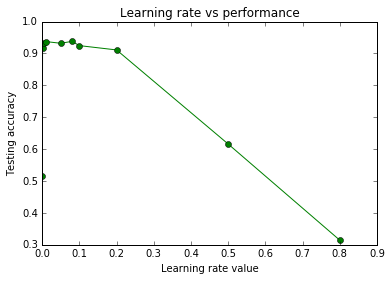

In [29]:
learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8]
acc_lr = []
for ilr in learning_rate:
    print 'Learning rate is', ilr
    model =  mlp(x_train,y_train, learning_rate = ilr, hidden_unit = 250, epsilon = 0.01, 
        momentum = 0.1, max_iter = 2000)
    pre =  prediction(x_test,model)
    a = acc(y_test,pre)
    print 'Accuracy is: ', a
    acc_lr.append(a)
    
plt.plot(learning_rate, acc_lr, 'go-')
plt.title("Learning rate vs performance")
plt.xlabel("Learning rate value")
plt.ylabel("Testing accuracy")
plt.show()

Momentum is 0.001
Accuracy is:  0.967156637575
Momentum is 0.005
Accuracy is:  0.966008268259
Momentum is 0.01
Accuracy is:  0.96531924667
Momentum is 0.05
Accuracy is:  0.952457510335
Momentum is 0.08
Accuracy is:  0.944189251263
Momentum is 0.1
Accuracy is:  0.93729903537
Momentum is 0.5
Accuracy is:  0.314423518604
Momentum is 0.7
Accuracy is:  0.314423518604
Momentum is 1
Accuracy is:  0.314423518604


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


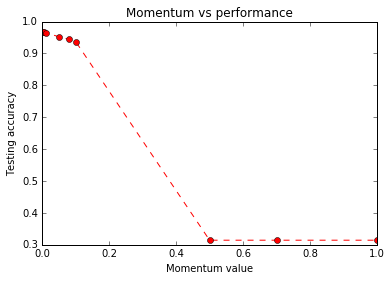

In [32]:
Momentum = [0.001,0.005, 0.01, 0.05, 0.08, 0.1, 0.5, 0.7, 1]
m_list = []
for im in Momentum:
    print 'Momentum is', im
    model =  mlp(x_train,y_train, learning_rate = 0.01, hidden_unit = 250, epsilon = 0.01, 
        momentum = im, max_iter = 2000)
    pre =  prediction(x_test,model)
    a = acc(y_test,pre)
    print 'Accuracy is: ', a
    m_list.append(a)
    
plt.plot(Momentum, m_list, 'ro--')
plt.title("Momentum vs performance")
plt.xlabel("Momentum value")
plt.ylabel("Testing accuracy")
plt.show()

### According to previous test, the best parameters are: 
learning rate:0.01, 
iteratioin: 3000, 
number of hidden layer unit: 250, 
momentum: 0.001

### Retrain the our dataset using previous conclution:

In [33]:
model =  mlp(x_train,y_train, learning_rate = 0.01, hidden_unit = 250, epsilon = 0.01, 
        momentum = 0.001, max_iter = 2000)
pre =  prediction(x_test,model)
a = acc(y_test,pre)
print 'Accuracy is: ', a

Accuracy is:  0.967156637575


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Result of using scikit-learn implementation:

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(250,), activation = 'logistic', max_iter=3000, learning_rate_init = 0.01, 
                    algorithm ='sgd',momentum = 0.001)
mlp.fit(x_train, y_train)
print "Testing accuracy:", mlp.score(x_test, y_test)

Testing accuracy: 0.974965548921


### The accuracy of my implementation is only 0.003 lower than the implementation using scikit-learn.